# Data Visualization for Homicide Reports across US from 1984


Reading the Data Frame from the csv file

In [37]:
from pandas import Series, DataFrame
import pandas as pd
import numpy as np
import seaborn as sns
import json
import folium

# import the csv files into dataframes
Homicidedataframe = DataFrame(pd.read_csv('HomicideReport.csv'))
Homicidedataframe

,Record ID,Agency Code,Agency Name,Agency Type,City,State,Year,Month,Incident,Crime Type,...,Victim Ethnicity,Perpetrator Sex,Perpetrator Age,Perpetrator Race,Perpetrator Ethnicity,Relationship,Weapon,Victim Count,Perpetrator Count,Record Source
0,1,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,January,1,Murder or Manslaughter,...,Unknown,Male,15,Native American/Alaska Native,Unknown,Acquaintance,Blunt Object,0,0,FBI
1,2,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
2,3,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,March,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,0,FBI
3,4,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,1,Murder or Manslaughter,...,Unknown,Male,42,White,Unknown,Acquaintance,Strangulation,0,0,FBI
4,5,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,April,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Unknown,0,1,FBI
5,6,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,1,Murder or Manslaughter,...,Unknown,Male,36,White,Unknown,Acquaintance,Rifle,0,0,FBI
6,7,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,May,2,Murder or Manslaughter,...,Unknown,Male,27,Black,Unknown,Wife,Knife,0,0,FBI
7,8,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,1,Murder or Manslaughter,...,Unknown,Male,35,White,Unknown,Wife,Knife,0,0,FBI
8,9,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,2,Murder or Manslaughter,...,Unknown,Unknown,0,Unknown,Unknown,Unknown,Firearm,0,0,FBI
9,10,AK00101,Anchorage,Municipal Police,Anchorage,Alaska,1980,June,3,Murder or Manslaughter,...,Unknown,Male,40,Unknown,Unknown,Unknown,Firearm,0,1,FBI


Select the Report based on State and Incident

In [38]:
AllStateReport = Homicidedataframe[['State','Incident']]

Dropping any Unknown Variables in the two columns

In [39]:
AllStateReport = AllStateReport.replace('Unknown', np.nan)
AllStateReport = AllStateReport.dropna()

Getting the sum of each state's Incident Report

In [40]:
StateGroupReport = AllStateReport.groupby('State',as_index=False).sum()
StateGroupReport

,State,Incident
0,Alabama,38149
1,Alaska,2704
2,Arizona,61337
3,Arkansas,12898
4,California,1011666
5,Colorado,15993
6,Connecticut,8727
7,Delaware,1592
8,District of Columbia,133621
9,Florida,8100400


Forming a barchart for each state

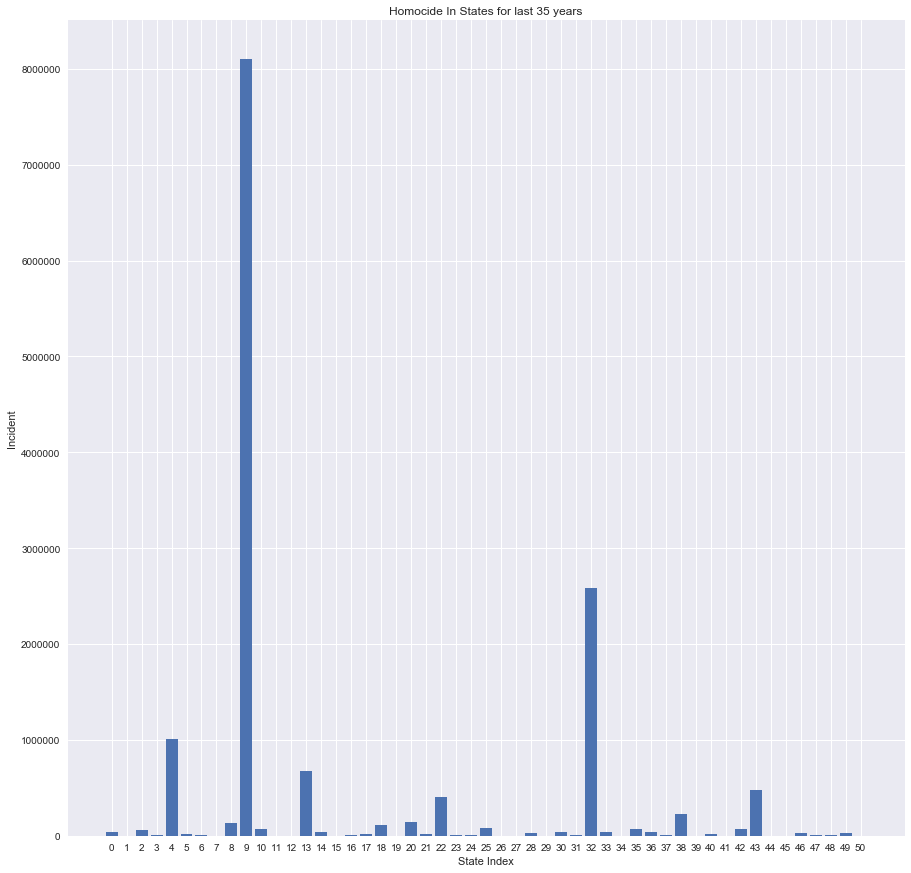

,State
0,Alabama
1,Alaska
2,Arizona
3,Arkansas
4,California
5,Colorado
6,Connecticut
7,Delaware
8,District of Columbia
9,Florida


In [41]:
%matplotlib inline

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,15))

plt.bar(range(51), StateGroupReport.Incident,
         align='center')

plt.xticks(range(51), StateGroupReport.index )

ax.set_ylabel('Incident')

ax.set_xlabel('State Index')

plt.title('Homocide In States for last 35 years')

plt.show()

StateGroupReport[['State']]

Getting the top 5 States with most Incidents

In [42]:
TopFiveStates = StateGroupReport.sort_values('Incident',ascending=False).head(5)
TopFiveStates

,State,Incident
9,Florida,8100400
32,New York,2580966
4,California,1011666
13,Illinois,675189
43,Texas,473974


Drawing a pie chart for top 5 states

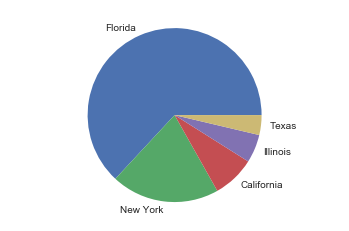

In [43]:
plt.axis('equal');
plt.rcParams['font.size'] = 9.0
plt.pie(TopFiveStates.Incident,labels=TopFiveStates.State);
plt.show()

Selecting the report for Relationships

In [44]:
RelationShipDF = Homicidedataframe[['Relationship','Incident']]
RelationShipDF

,Relationship,Incident
0,Acquaintance,1
1,Acquaintance,1
2,Unknown,2
3,Acquaintance,1
4,Unknown,2
5,Acquaintance,1
6,Wife,2
7,Wife,1
8,Unknown,2
9,Unknown,3


Getting the sum of Incidents for Relationship

In [45]:
RelationShipDFGroup = RelationShipDF.groupby('Relationship',as_index=False).sum()
RelationShipDFGroup.sort_values('Incident',ascending=False)

,Relationship,Incident
26,Unknown,10608316
25,Stranger,1138705
0,Acquaintance,867173
27,Wife,503706
13,Friend,268593
11,Family,228327
20,Son,218332
6,Daughter,154831
15,Husband,111806
12,Father,93302


Printing a bar chart for the relationship and incident after removing unknown

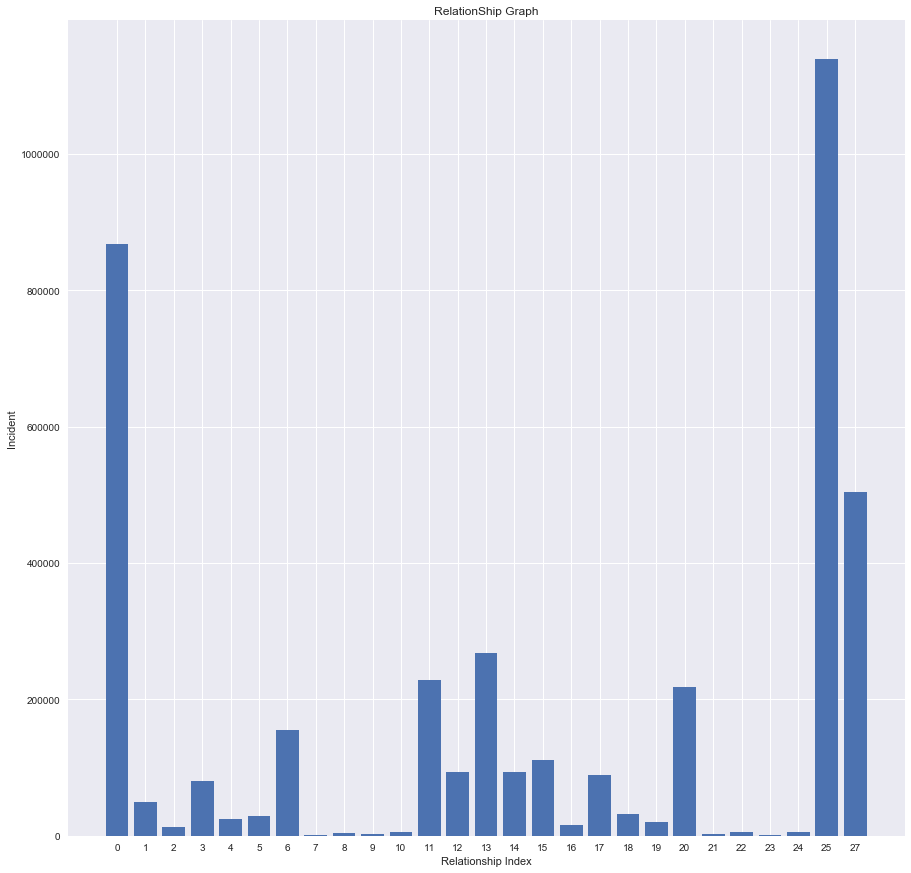

,Relationship
0,Acquaintance
1,Boyfriend
2,Boyfriend/Girlfriend
3,Brother
4,Common-Law Husband
5,Common-Law Wife
6,Daughter
7,Employee
8,Employer
9,Ex-Husband


In [46]:
RelationShipDFGroup = RelationShipDFGroup[RelationShipDFGroup.Relationship != 'Unknown']

fig, ax = plt.subplots(figsize=(15,15))

plt.bar(range(27), RelationShipDFGroup.Incident,
         align='center')

plt.xticks(range(27), RelationShipDFGroup.index )

ax.set_ylabel('Incident')

ax.set_xlabel('Relationship Index')

plt.title('RelationShip Graph')

plt.show()

RelationShipDFGroup[['Relationship']]

Getting top 5 Relationship

In [47]:
TopFiveRelationship = RelationShipDFGroup.sort_values('Incident',ascending=False).head(5)
TopFiveRelationship

,Relationship,Incident
25,Stranger,1138705
0,Acquaintance,867173
27,Wife,503706
13,Friend,268593
11,Family,228327


Drawing a Piechart for top 5 Relationship

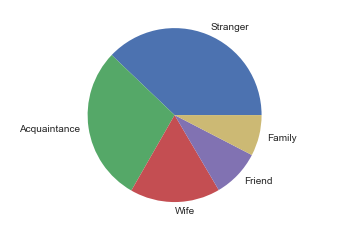

In [48]:
plt.axis('equal');
plt.rcParams['font.size'] = 9.0
plt.pie(TopFiveRelationship.Incident,labels=TopFiveRelationship.Relationship);
plt.show()

Grouping the Report for Weapon

In [49]:
WeaponDF = Homicidedataframe[['Weapon','Incident']]
WeaponDF = WeaponDF.groupby('Weapon',as_index=False).sum()
WeaponDF

,Weapon,Incident
0,Blunt Object,1591719
1,Drowning,6012
2,Drugs,37076
3,Explosives,7150
4,Fall,1830
5,Fire,119624
6,Firearm,2172063
7,Gun,11544
8,Handgun,7105162
9,Knife,1910636


Removing the unknown weapon

In [50]:
WeaponDF = WeaponDF[WeaponDF.Weapon != 'Unknown']
WeaponDF

,Weapon,Incident
0,Blunt Object,1591719
1,Drowning,6012
2,Drugs,37076
3,Explosives,7150
4,Fall,1830
5,Fire,119624
6,Firearm,2172063
7,Gun,11544
8,Handgun,7105162
9,Knife,1910636


Pie Chart for top 5 Weapons

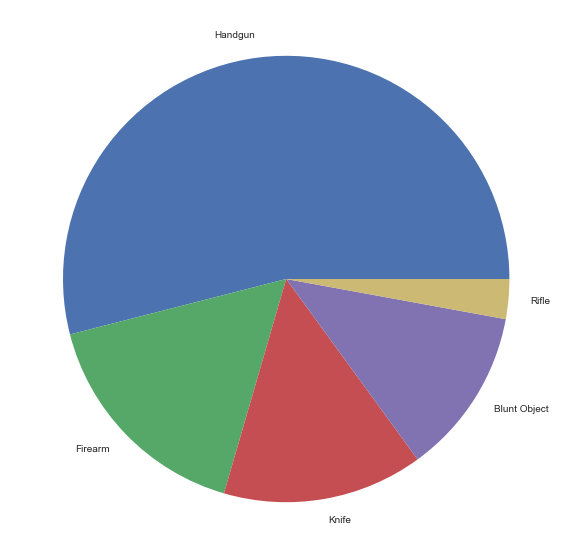

In [51]:
WeaponDF = WeaponDF.sort_values('Incident',ascending=False).head(5)
plt.axis('equal');
plt.rcParams['font.size'] = 15.0
fig = plt.gcf()
fig.set_size_inches(10,10) 
plt.pie(WeaponDF.Incident,labels=WeaponDF.Weapon);
plt.show()

Draw Line Graph for Relationship - Year - Incident Relationship

In [52]:
RelationshipYearDF = Homicidedataframe[['Year','Relationship','Incident']]
RelationshipYearDF

,Year,Relationship,Incident
0,1980,Acquaintance,1
1,1980,Acquaintance,1
2,1980,Unknown,2
3,1980,Acquaintance,1
4,1980,Unknown,2
5,1980,Acquaintance,1
6,1980,Wife,2
7,1980,Wife,1
8,1980,Unknown,2
9,1980,Unknown,3


Group By Year and Relationship

In [53]:
RelationshipYearDF = RelationshipYearDF.groupby(['Year', 'Relationship'],as_index=False).sum()
RelationshipYearDF

,Year,Relationship,Incident
0,1980,Acquaintance,49066
1,1980,Boyfriend,2648
2,1980,Boyfriend/Girlfriend,568
3,1980,Brother,2378
4,1980,Common-Law Husband,2639
5,1980,Common-Law Wife,2080
6,1980,Daughter,1753
7,1980,Employee,13
8,1980,Employer,86
9,1980,Ex-Husband,411


Getting the top 5 Relationship apart from Unknown and Stranger

In [54]:
TopFiveRelationShipDFGroup = RelationShipDFGroup.sort_values('Incident',ascending=False)
TopFiveRelationShipDFGroup = TopFiveRelationShipDFGroup[~TopFiveRelationShipDFGroup.Relationship.isin(['Unknown','Stranger'])].head(5)
TopFiveRelationShipDFGroup

,Relationship,Incident
0,Acquaintance,867173
27,Wife,503706
13,Friend,268593
11,Family,228327
20,Son,218332


Pivot the table for top 5 Relationship

In [55]:
RelationshipYearDF = RelationshipYearDF[RelationshipYearDF.Relationship.isin(TopFiveRelationShipDFGroup.Relationship)]
RelationshipYearDF = RelationshipYearDF.pivot(index='Year', columns='Relationship', values='Incident')
RelationshipYearDF

Relationship,Acquaintance,Family,Friend,Son,Wife
Year,,,,,
1980,49066,1937,13810,2965,5886
1981,48047,2962,13410,3086,4813
1982,32750,2974,10393,3077,4170
1983,40231,4452,11249,3140,5991
1984,34910,3500,5715,1412,4596
1985,32673,2331,7398,2000,4103
1986,35155,4006,14902,3420,4217
1987,47547,3527,9809,1436,3629
1988,56413,3812,10402,1964,4472


Draw Line Graph

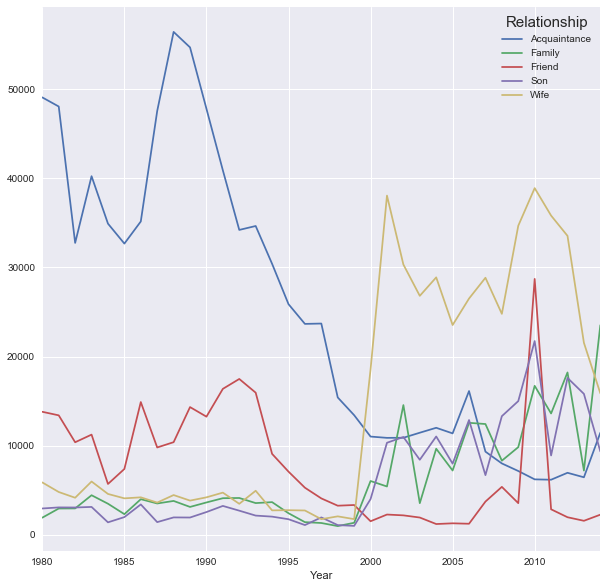

In [56]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10
RelationshipYearDF.plot()
plt.show()

Getting Year wise Incident Count

In [57]:
YearWiseIncident = Homicidedataframe[['Year','Incident']]
YearWiseIncident = YearWiseIncident.groupby('Year',as_index=False).sum()
YearWiseIncident

,Year,Incident
0,1980,337811
1,1981,288723
2,1982,256729
3,1983,277582
4,1984,205706
5,1985,184987
6,1986,234804
7,1987,228873
8,1988,280701
9,1989,295626


Histogram for Incident Count in Each Year

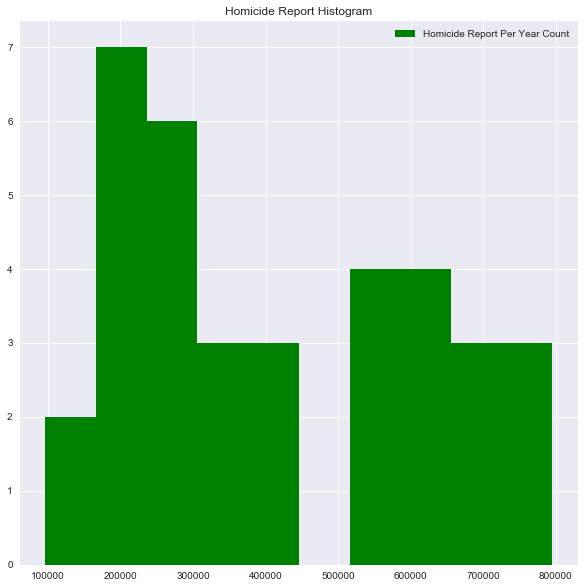

In [58]:
plt.rcParams['font.size'] = 9.0
plt.hist(YearWiseIncident.Incident, 10, histtype='stepfilled',
         align='mid', color='g', label='Homicide Report Per Year Count')
plt.legend()
plt.title('Homicide Report Histogram')
plt.show()

Getting Perpetrator Race Data

In [59]:
RaceHomicideDF = Homicidedataframe[['Year','Perpetrator Race','Incident']]
RaceHomicideDF = RaceHomicideDF[RaceHomicideDF['Perpetrator Race']!='Unknown']
RaceHomicideDF = RaceHomicideDF.groupby(['Year', 'Perpetrator Race'],as_index=False).sum()
RaceHomicideDF

,Year,Perpetrator Race,Incident
0,1980,Asian/Pacific Islander,780
1,1980,Black,124502
2,1980,Native American/Alaska Native,364
3,1980,White,61961
4,1981,Asian/Pacific Islander,1014
5,1981,Black,112839
6,1981,Native American/Alaska Native,412
7,1981,White,72048
8,1982,Asian/Pacific Islander,2019
9,1982,Black,88584


Pivot Table

In [60]:
RaceHomicideDF=RaceHomicideDF.pivot(index='Year', columns='Perpetrator Race', values='Incident')
RaceHomicideDF=RaceHomicideDF.fillna(0)
RaceHomicideDF

Perpetrator Race,Asian/Pacific Islander,Black,Native American/Alaska Native,White
Year,,,,
1980,780,124502,364,61961
1981,1014,112839,412,72048
1982,2019,88584,330,66749
1983,1509,97123,208,73582
1984,1192,66185,183,55491
1985,1088,65282,383,48753
1986,1750,90604,357,55499
1987,1324,77421,523,48588
1988,1089,95595,270,55126


Draw Scatter Plot for Perpetrator Race

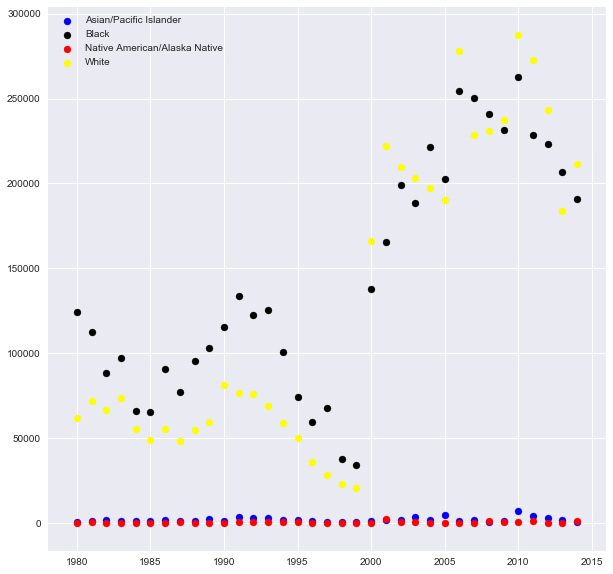

In [61]:
rcParams['figure.figsize'] = 10, 10
Asian = plt.scatter(RaceHomicideDF.index, RaceHomicideDF['Asian/Pacific Islander'],color='Blue')
Black = plt.scatter(RaceHomicideDF.index, RaceHomicideDF['Black'],color='Black')
NativeAmerican = plt.scatter(RaceHomicideDF.index, RaceHomicideDF['Native American/Alaska Native'],color='Red')
White = plt.scatter(RaceHomicideDF.index, RaceHomicideDF['White'],color='Yellow')
plt.legend((Asian, Black, NativeAmerican, White),
           ('Asian/Pacific Islander', 'Black', 'Native American/Alaska Native', 'White'),
           loc='upper left',)
plt.show()

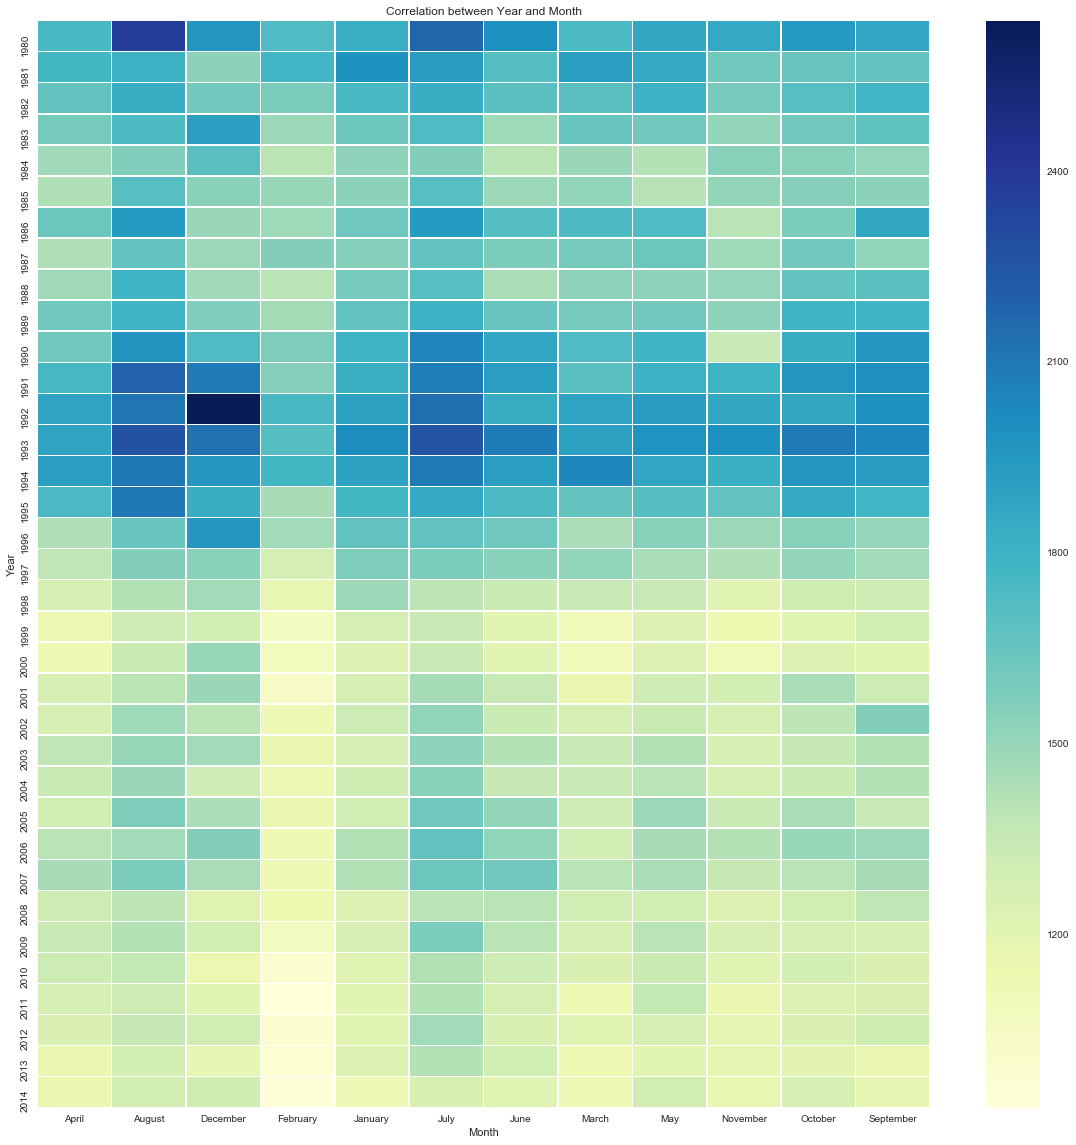

In [62]:
sns.set_style('whitegrid')
homicide_stats = pd.io.parsers.read_csv("HomicideReport.csv", low_memory=False)
year_month=homicide_stats.groupby(['Year','Month'], as_index= False).size().reset_index(name='count')
#year_month
hs2=pd.pivot_table(year_month,index='Year',columns='Month',values='count')
data=hs2
plt.figure(figsize=(20,20))
sns.heatmap(data,linewidths=.5,cmap="YlGnBu" ) 
plt.title('Correlation between Year and Month')
plt.show()

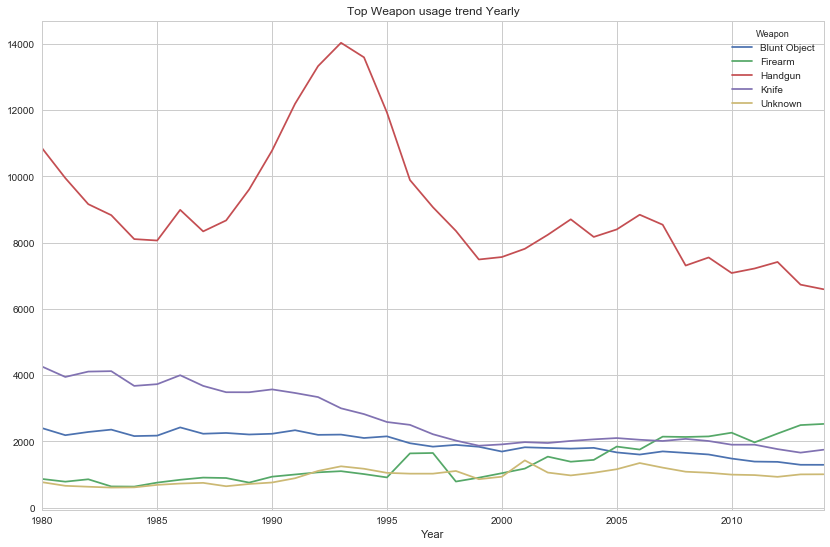

In [65]:
top_weapon = homicide_stats.groupby(['Weapon'], as_index= False).size().reset_index(name='count').sort_values('count',ascending=False).head()
weapon_stats=homicide_stats.groupby(['Year','Weapon'], as_index= False).size().reset_index(name='count')
weapon_stats=weapon_stats[weapon_stats.Weapon.isin(top_weapon.Weapon)]
#weapon_stats
ws=pd.pivot_table(weapon_stats, index='Year',columns='Weapon',values='count')
ws.plot(title = 'Top Weapon usage trend Yearly',kind='line',grid=True,figsize=(14,9))
plt.show()

In [66]:
states_abbrev = {
        'AK': 'Alaska',
        'AL': 'Alabama',
        'AR': 'Arkansas',
        'AS': 'American Samoa',
        'AZ': 'Arizona',
        'CA': 'California',
        'CO': 'Colorado',
        'CT': 'Connecticut',
        'DC': 'District of Columbia',
        'DE': 'Delaware',
        'FL': 'Florida',
        'GA': 'Georgia',
        'GU': 'Guam',
        'HI': 'Hawaii',
        'IA': 'Iowa',
        'ID': 'Idaho',
        'IL': 'Illinois',
        'IN': 'Indiana',
        'KS': 'Kansas',
        'KY': 'Kentucky',
        'LA': 'Louisiana',
        'MA': 'Massachusetts',
        'MD': 'Maryland',
        'ME': 'Maine',
        'MI': 'Michigan',
        'MN': 'Minnesota',
        'MO': 'Missouri',
        'MP': 'Northern Mariana Islands',
        'MS': 'Mississippi',
        'MT': 'Montana',
        'NA': 'National',
        'NC': 'North Carolina',
        'ND': 'North Dakota',
        'NE': 'Nebraska',
        'NH': 'New Hampshire',
        'NJ': 'New Jersey',
        'NM': 'New Mexico',
        'NV': 'Nevada',
        'NY': 'New York',
        'OH': 'Ohio',
        'OK': 'Oklahoma',
        'OR': 'Oregon',
        'PA': 'Pennsylvania',
        'PR': 'Puerto Rico',
        'RI': 'Rhode Island',
        'SC': 'South Carolina',
        'SD': 'South Dakota',
        'TN': 'Tennessee',
        'TX': 'Texas',
        'UT': 'Utah',
        'VA': 'Virginia',
        'VI': 'Virgin Islands',
        'VT': 'Vermont',
        'WA': 'Washington',
        'WI': 'Wisconsin',
        'WV': 'West Virginia',
        'WY': 'Wyoming'
}

state_abb_df = pd.DataFrame()
state_abb_df['Code'] = states_abbrev.keys()
state_abb_df['State'] = states_abbrev.values()

state_abb_df. head()

,Code,State
0,WA,Washington
1,WI,Wisconsin
2,WV,West Virginia
3,FL,Florida
4,WY,Wyoming


In [67]:
state_geo = json.load(file('us-states.json'))


state_report = homicide_stats.groupby(['State']).size().reset_index(name='Average_homicides_per_year')
state_report['Average_homicides_per_year'] = state_report['Average_homicides_per_year'].div(34) 
state_report = pd.merge(state_report, state_abb_df, on='State', how='inner')
state_report.head()

,State,Average_homicides_per_year,Code
0,Alabama,334.588235,AL
1,Alaska,47.558824,AK
2,Arizona,378.558824,AZ
3,Arkansas,204.323529,AR
4,California,2934.794118,CA


In [68]:
state_geo = r'us-states.json'
state_report=state_report[['Code','Average_homicides_per_year']]
#state_report

map = folium.Map(location=[40, -99], zoom_start=4)
map.geo_json(geo_path=state_geo, data=state_report,
             columns=['Code', 'Average_homicides_per_year'],
             key_on='feature.id',
             threshold_scale = [0,300,600,1000,2000,3000], #[0,300,600,900,1200,1500,1800,2100,2400,2700,3000],
             fill_color='YlOrRd', fill_opacity=0.9, line_opacity=0.2,
             legend_name='Average Crime rate statewise')
map

C:\Users\Manoj\Anaconda2\lib\site-packages\folium\folium.py:504: UserWarning: This method is deprecated. Please use Map.choropleth instead.
  warnings.warn('This method is deprecated. '


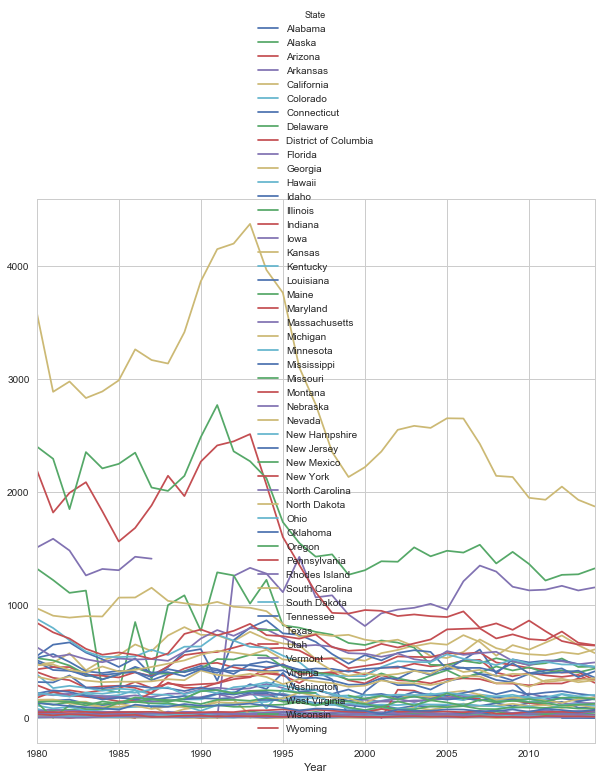

In [93]:
xls_file=Homicidedataframe.groupby(['State','Year']).size().reset_index(name='Counts')
xls_file=xls_file.pivot(index='Year',columns='State',values='Counts')
xls_file.plot()
plt.show()

In [94]:
frame = DataFrame(xls_file)
frame

State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,District of Columbia,Florida,...,South Dakota,Tennessee,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming
Year,,,,,,,,,,,,,,,,,,,,,
1980,513.0,47.0,293.0,214.0,3590.0,198.0,158.0,44.0,180.0,1508.0,...,5.0,497.0,2402.0,53.0,9.0,468.0,222.0,134.0,145.0,34.0
1981,453.0,69.0,237.0,209.0,2885.0,230.0,155.0,41.0,232.0,1586.0,...,10.0,426.0,2293.0,54.0,9.0,474.0,208.0,122.0,148.0,26.0
1982,424.0,75.0,247.0,195.0,2976.0,193.0,164.0,36.0,204.0,1482.0,...,16.0,418.0,1848.0,55.0,5.0,427.0,192.0,107.0,148.0,34.0
1983,372.0,74.0,225.0,199.0,2830.0,214.0,130.0,27.0,188.0,1262.0,...,11.0,393.0,2352.0,56.0,6.0,405.0,226.0,97.0,135.0,30.0
1984,382.0,52.0,248.0,183.0,2888.0,192.0,116.0,24.0,175.0,1319.0,...,10.0,343.0,2208.0,49.0,14.0,457.0,216.0,88.0,124.0,20.0
1985,397.0,50.0,264.0,188.0,2986.0,204.0,124.0,32.0,149.0,1308.0,...,9.0,387.0,2248.0,53.0,17.0,413.0,234.0,75.0,142.0,25.0
1986,407.0,47.0,321.0,202.0,3260.0,247.0,148.0,32.0,154.0,1427.0,...,18.0,454.0,2347.0,55.0,12.0,427.0,225.0,120.0,144.0,29.0
1987,336.0,48.0,266.0,187.0,3166.0,211.0,162.0,32.0,225.0,1410.0,...,11.0,404.0,2039.0,56.0,16.0,453.0,254.0,104.0,168.0,11.0
1988,389.0,30.0,306.0,216.0,3135.0,206.0,181.0,34.0,375.0,NaN,...,13.0,407.0,2009.0,48.0,12.0,482.0,273.0,101.0,145.0,14.0


In [98]:
GeorgiaPlot = frame[['Georgia']]
GeorgiaPlot

State,Georgia
Year,
1980,475.0
1981,491.0
1982,574.0
1983,424.0
1984,511.0
1985,557.0
1986,652.0
1987,593.0
1988,731.0


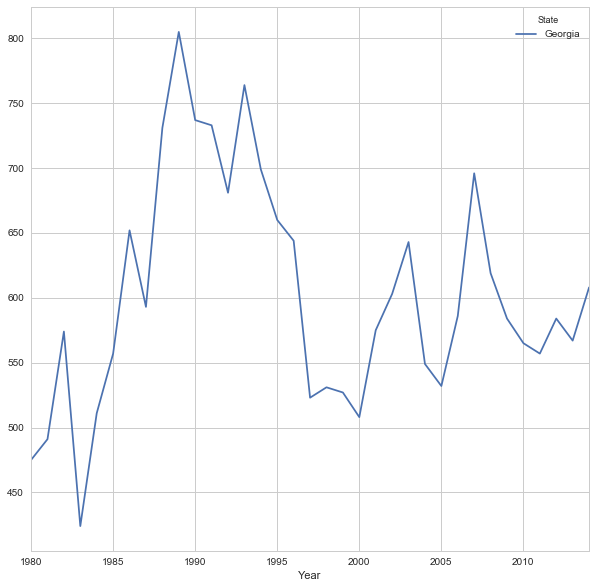

In [100]:
GeorgiaPlot.plot()
plt.show()

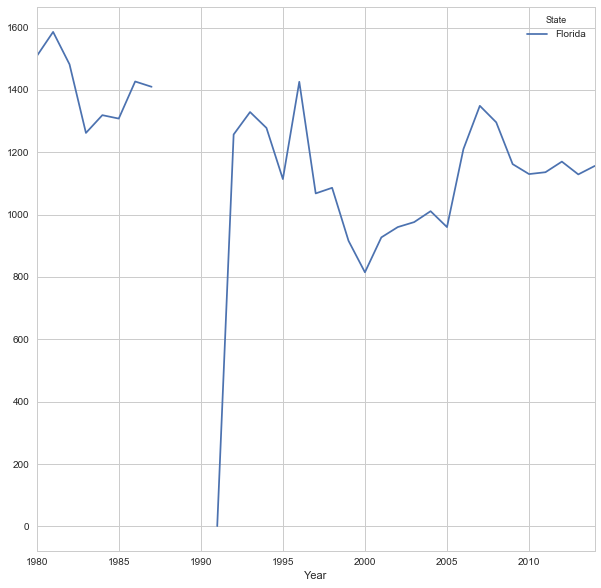

In [101]:
Floridaset = frame[['Florida']]
Floridaset.plot()
plt.show()

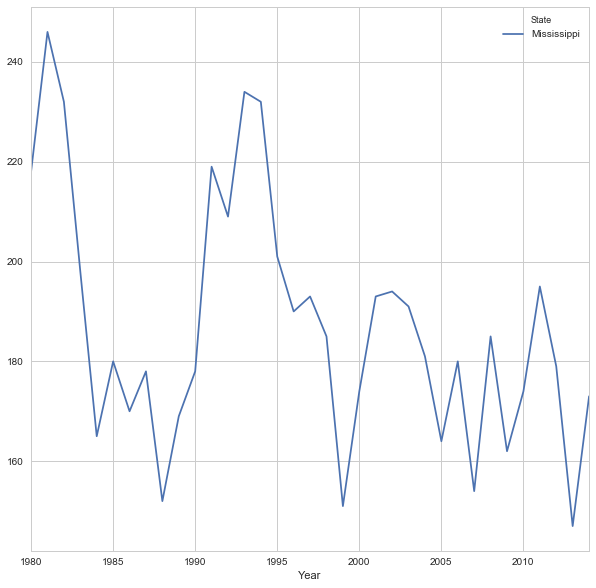

In [103]:
MississippiSet=frame[['Mississippi']]
MississippiSet.plot()
plt.show()

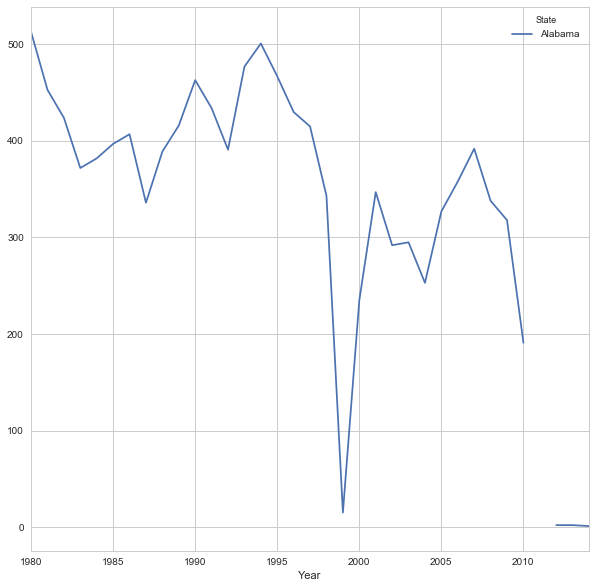

In [104]:
AlabamaSet = frame[['Alabama']]
AlabamaSet.plot()
plt.show()

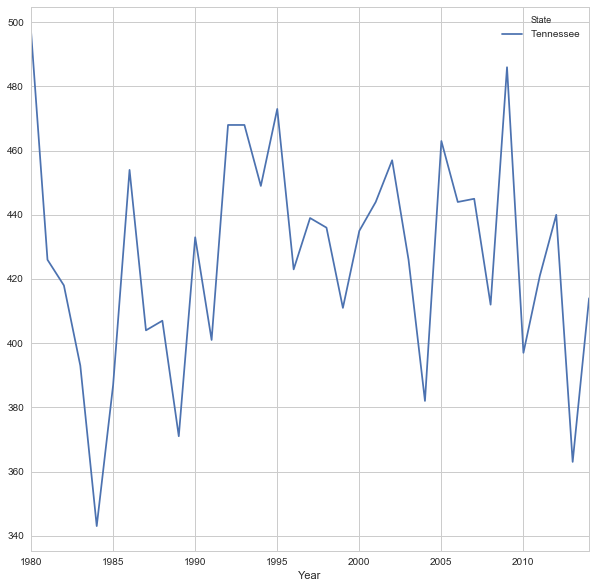

In [105]:
TennesseeSet = frame[['Tennessee']]
TennesseeSet.plot()
plt.show()

In [107]:
Perpetrator_sex= Homicidedataframe.groupby('Perpetrator Sex').size().sort_values(ascending=False).to_frame('Total').reset_index()
Perpetrator_sex

,Perpetrator Sex,Total
0,Male,399541
1,Unknown,190365
2,Female,48548


In [108]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.charts import Bar, Histogram, Line, output_file, show
from bokeh.charts.attributes import cat, color
pd.options.display.max_columns = 20
output_notebook()

Per_sexes = Bar(Perpetrator_sex, 
                values='Total', 
                label=cat(columns='Perpetrator Sex', sort=False), 
                color=color(columns='Perpetrator Sex', palette=['Red'], sort=False), 
                legend=False,
                title='Perpetrator Sexes')


show(Per_sexes)

Loading BokehJS ...

In [110]:

Victim_Count= Homicidedataframe.groupby('Victim Count').size().sort_values(ascending=False).to_frame('Total').reset_index()
Victim_Count

,Victim Count,Total
0,0,586059
1,1,38750
2,2,8156
3,3,2847
4,4,1084
5,5,510
6,9,290
7,6,286
8,7,168
9,10,160


In [111]:
# Bar chart for Victim Count

Vic_Count = Bar(Victim_Count, 
                values='Total', 
                label=cat(columns='Victim Count', sort=False), 
                color=color(columns='Victim Count', palette=['Green'], sort=False), 
                legend=False,
                title='Victim_Counts')


show(Vic_Count)

In [112]:
#Weapon Series used and it's total

Weapon_Series= Homicidedataframe.groupby('Weapon').size().sort_values(ascending=False).to_frame('Total').reset_index()
Weapon_Series

,Weapon,Total
0,Handgun,317484
1,Knife,94962
2,Blunt Object,67337
3,Firearm,46980
4,Unknown,33192
5,Shotgun,30722
6,Rifle,23347
7,Strangulation,8110
8,Fire,6173
9,Suffocation,3968


In [113]:
#Bar Chart for Wepaon's used 

Weapon_Ser = Bar(Weapon_Series, 
                values='Total', 
                label=cat(columns='Weapon', sort=False), 
                color=color(columns='Weapon', palette=['Green'], sort=False), 
                legend=False,
                title='Weapon_Series')


show(Weapon_Ser)

In [114]:
# Top Cities affeted by the homicide data frame

top_cities = Homicidedataframe.groupby('City').size().sort_values(ascending=False).to_frame('Total').reset_index().head(15)
top_cities

,City,Total
0,Los Angeles,44511
1,New York,38431
2,Cook,22383
3,Wayne,19904
4,Harris,16331
5,Philadelphia,12851
6,Dallas,11377
7,Jefferson,9573
8,Baltimore city,9336
9,Dade,9077


In [115]:
# Bar Chart 

cities = Bar(top_cities,
             values='Total',
             label=cat(columns='City', sort=False),
             color=color(columns='City', palette=['Red'], sort=False),
             legend=False,
             title="Cities")

show(cities)

In [116]:
# Dataframe for all the Races (Victim Race) and it's Total

df = pd.DataFrame()
df
df['Black'] = Homicidedataframe[(Homicidedataframe['Victim Race'] == 'Black')]['Year'].value_counts()
df['White'] = Homicidedataframe[(Homicidedataframe['Victim Race'] == 'White')]['Year'].value_counts()
df['Native'] = Homicidedataframe[(Homicidedataframe['Victim Race'] == 'Native American/Alaska Native')]['Year'].value_counts()
df['Asian'] = Homicidedataframe[(Homicidedataframe['Victim Race'] == 'Asian/Pacific Islander')]['Year'].value_counts()
df['Total'] = Homicidedataframe[Homicidedataframe['Victim Race'] != np.nan]['Year'].value_counts()

df = df.reset_index().rename(columns={'index': 'Year'})
df

,Year,Black,White,Native,Asian,Total
0,1993,12269,11260,148,449,24335
1,1994,11723,10825,139,393,23246
2,1992,11705,11338,160,410,23793
3,1991,11190,10715,144,420,22657
4,1990,10344,10298,139,221,21246
5,1995,10133,10278,160,408,21179
6,1980,9842,12270,154,168,23092
7,1989,9684,9617,136,226,19868
8,1981,9335,11412,136,191,21208
9,1996,9049,9294,121,346,18969


In [122]:
#bar chart for the Victim"s Race Yearwise and it's comparison

show(Bar(df,
          values=blend('Black', 'White', 'Asian', 'Native', name='victims', labels_name='victim'),
          label=cat(columns='Year', sort=True),
          stack=cat(columns='victim', sort=True),
          color=color(columns='victim', palette=['Red', 'Green', 'Blue','Yellow'], sort=False),
          legend='top_right',
          title="Victims per Race"))

SyntaxError: invalid syntax (<ipython-input-122-a2f1035c38be>, line 4)

In [119]:
df = pd.DataFrame()
df
df['Black'] = Homicidedataframe[(Homicidedataframe['Victim Race'] == 'Black')]['Year'].value_counts()
df['White'] = Homicidedataframe[(Homicidedataframe['Victim Race'] == 'White')]['Year'].value_counts()
df['Native'] = Homicidedataframe[(Homicidedataframe['Victim Race'] == 'Native American/Alaska Native')]['Year'].value_counts()
df['Asian'] = Homicidedataframe[(Homicidedataframe['Victim Race'] == 'Asian/Pacific Islander')]['Year'].value_counts()

df = df.reset_index().rename(columns={'index': 'Year'})
df

,Year,Black,White,Native,Asian
0,1993,12269,11260,148,449
1,1994,11723,10825,139,393
2,1992,11705,11338,160,410
3,1991,11190,10715,144,420
4,1990,10344,10298,139,221
5,1995,10133,10278,160,408
6,1980,9842,12270,154,168
7,1989,9684,9617,136,226
8,1981,9335,11412,136,191
9,1996,9049,9294,121,346


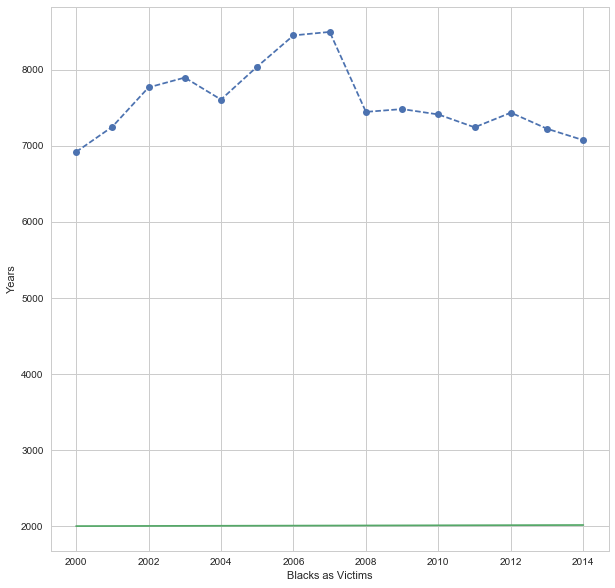

In [120]:
x = np.array([6921,7252,7770,7899,7610,8044,8454,8500,7448,7485,7414,7245,7438,7226,7076])
y = np.array([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014])
plt.plot(range(2000,2015), x, 'o--')
plt.xlabel('Blacks as Victims')
plt.ylabel('Years')
plt.plot(range(2000,2015),y)
plt.show()

C:\Users\Manoj\Anaconda2\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


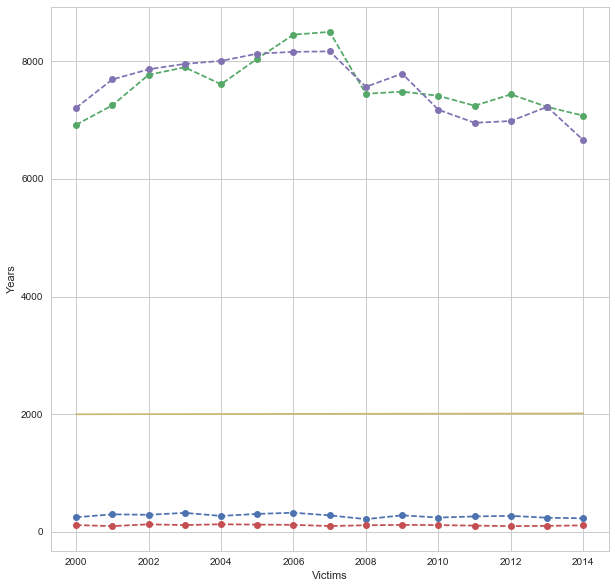

In [121]:
x = np.array([6921,7252,7770,7899,7610,8044,8454,8500,7448,7485,7414,7245,7438,7226,7076])
x1= np.array([249,299,291,324,272,306,326,281,217,282,244,263,273,241,232])
x2= np.array([116,99,129,116,130,124,120,100,113,119,116,107,99,103,111])
x3= np.array([7210,7691,7864,7956,8007,8130,8161,8169,7566,7791,7177,6955,6985,7226,6660])
y = np.array([2000,2001,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014])
plt.plot(range(2000,2015), x1, 'o--')
plt.plot(range(2000,2015), x, 'o--')
plt.plot(range(2000,2015), x2, 'o--')
plt.plot(range(2000,2015), x3, 'o--')
#legend(x='Blacks',x1='Asian',x2='Native',x3='White','top_right')
plt.legend(loc='upper right')
plt.xlabel('Victims')
plt.ylabel('Years')
plt.plot(range(2000,2015),y)
plt.show()